<a href="https://colab.research.google.com/github/gregbg218/miniproj/blob/master/miniproj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

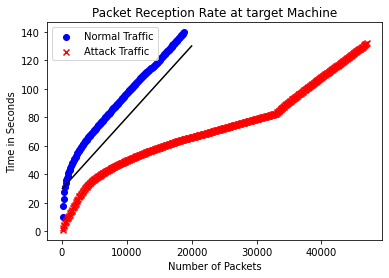

[1.]
[0.]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       1.00      1.00      1.00       119

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

[[ 46   0]
 [  0 119]]


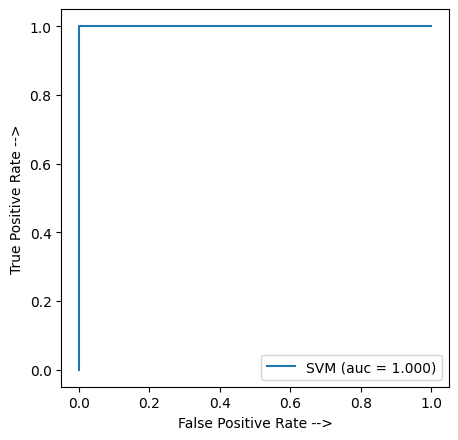





              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

[[26  0]
 [ 0 16]]


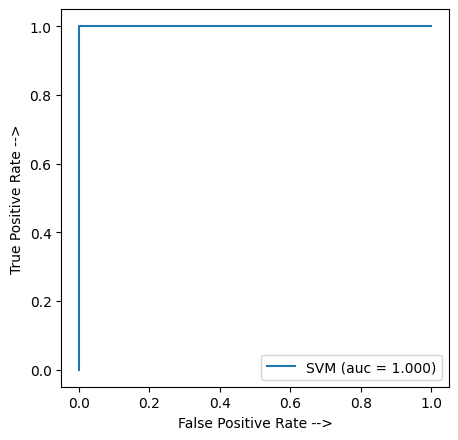

[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
[0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm,f1_score,roc_curve,auc,classification_report

classifier = SVC(kernel = 'linear')

normal_data = np.genfromtxt('normal_data100.csv',delimiter=',')
attack_data = np.genfromtxt('attack_data100.csv',delimiter=',')
'''print(normal_data.shape)
print(attack_data.shape)
print(int(normal_data.size/2))
print(attack_data)'''
normal_class = np.zeros(int(normal_data.size/2))
attack_class = np.ones(int(attack_data.size/2))
'''print("\n")
print(normal_class.shape)
print(attack_class.shape)
print("\n")'''

X = np.append(normal_data,attack_data,axis=0)
Y = np.append(normal_class,attack_class,axis=0)
'''print(X.shape)
print(Y.shape)'''
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=4)
#print(X_test.shape)


#plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='spring')
nscatter = plt.scatter(normal_data[:,0],normal_data[:,1],c='b',marker='o')
ascatter = plt.scatter(attack_data[:,0],attack_data[:,1],c='r',marker='x')
plt.legend((nscatter,ascatter),('Normal Traffic','Attack Traffic'))

plt.title('Packet Reception Rate at target Machine')
plt.ylabel('Time in Seconds')
plt.xlabel('Number of Packets')

x = np.linspace(0,20000)
# (80,20) (20000,100)
m = 1/200
h = 20
y = m*x+h
d = 0.3
p1 = [80,20000]
p2 = [30,130]
plt.plot(p1,p2,'-k')

plt.show()



classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)
print(classifier.predict([[4000,32.1482]]))
print(classifier.predict([[4000,65.4566]]))
print(classification_report(y_test,y_predict))
print(cm(y_test,y_predict))








svm_fpr, svm_tpr, threshold = roc_curve(y_test,y_predict)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()



print("\n")
print("\n")
normal_datanew = np.genfromtxt('strip_norm.csv',delimiter=',')
attack_datanew = np.genfromtxt('strip_att.csv',delimiter=',')
normal_classnew = np.zeros(int(normal_datanew.size/2))
attack_classnew = np.ones(int(attack_datanew.size/2))
Xnew = np.append(normal_datanew,attack_datanew,axis=0)
Ynew= np.append(normal_classnew,attack_classnew,axis=0)
X_trainnew,X_testnew,y_trainnew,y_testnew=train_test_split(Xnew,Ynew,test_size=0.2,random_state=1)
y_predictnew=classifier.predict(X_testnew)
print(classification_report(y_testnew,y_predictnew))
print(cm(y_testnew,y_predictnew))
svm_fpr, svm_tpr, threshold = roc_curve(y_testnew,y_predictnew)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

print(y_trainnew)
print(y_testnew)